In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

try:
    df = pd.read_csv("Cleaned_merged_suffixed.csv")
    print("Dataset loaded successfully.")
    print(f"Original shape: {df.shape}")
except FileNotFoundError:
    print("Error: 'Cleaned_merged_suffixed.csv' not found.")
    df = pd.DataFrame()

if not df.empty:
    target_column = 'Wheat_Whole Year_Yield' 
    
    if target_column not in df.columns:
        print(f"Error: Target column '{target_column}' not found.")
        print("Available columns:", df.columns.tolist())
    else:
        df_filtered = df[df[target_column] > 0].copy()
        print(f"Filtered data to {len(df_filtered)} rows where '{target_column}' is not zero.")

        # Separating Features (X) and Target (y)
        y = df_filtered[target_column]


        # Identifying all yield-related columns to remove from features and non-numeric identifier columns
        yield_cols_to_drop = [col for col in df_filtered.columns if 'Yield' in col]
        
        identifiers_to_drop = [col for col in ['State', 'District'] if col in df_filtered.columns]
        
        final_cols_to_drop = identifiers_to_drop + yield_cols_to_drop
        
        X = df_filtered.drop(columns=final_cols_to_drop)
        
        for col in X.columns:
            X[col] = pd.to_numeric(X[col], errors='coerce')
        X.fillna(0, inplace=True)

        print(f"Target (y): '{target_column}'")
        print(f"Features (X): {X.shape[1]} columns")

        # Split, Train, and Evaluate
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        print(f"Split data into {len(X_train)} training samples and {len(X_test)} testing samples.")

        print("\nTraining a RandomForestRegressor model...")
        model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
        model.fit(X_train, y_train)
        print("Model training complete.")

        print("\nEvaluating model performance...")
        predictions = model.predict(X_test)
        
        mae = mean_absolute_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)

        print(f"-> Mean Absolute Error (MAE): {mae:.2f}")
        print(f"-> R-squared (R²): {r2:.2f}")

✅ Dataset loaded successfully.
Original shape: (16492, 425)
Filtered data to 57 rows where 'Wheat_Whole Year_Yield' is not zero.
🎯 Target (y): 'Wheat_Whole Year_Yield'
⚙️ Features (X): 185 columns
Split data into 45 training samples and 12 testing samples.

Training a RandomForestRegressor model...
✅ Model training complete.

Evaluating model performance...
-> Mean Absolute Error (MAE): 10976.19
-> R-squared (R²): 0.88


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

try:
    df = pd.read_csv("Cleaned_merged_suffixed.csv")
    print("Dataset loaded successfully.")
    print(f"Original shape: {df.shape}")
except FileNotFoundError:
    print("Error: 'Cleaned_merged_suffixed.csv' not found.")
    df = pd.DataFrame()

if not df.empty:
    all_yield_columns = [col for col in df.columns if 'Yield' in col]
    print(f"Found {len(all_yield_columns)} yield columns to model.")
    
    model_results = []

    # Looping through each Yield Column to build a Model
    for target_column in all_yield_columns:
        print(f"\n--- Processing Target: {target_column} ---")

        # Filtering data for non-zero yields for the current crop
        df_filtered = df[df[target_column] > 0].copy()

        # If there are too few samples, it's not possible to build a good model.
        if len(df_filtered) < 50:
            print(f"Skipping '{target_column}': Only {len(df_filtered)} non-zero samples found (minimum is 50).")
            continue
            
        print(f"Found {len(df_filtered)} non-zero samples.")

        # Separating Features (X) and Target (y)
        y = df_filtered[target_column]
        
        identifiers_to_drop = [col for col in ['State', 'District'] if col in df_filtered.columns]
        features_to_drop = identifiers_to_drop + all_yield_columns
        X = df_filtered.drop(columns=features_to_drop)
        
        for col in X.columns:
            X[col] = pd.to_numeric(X[col], errors='coerce')
        X.fillna(0, inplace=True)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
        model.fit(X_train, y_train)

        predictions = model.predict(X_test)
        mae = mean_absolute_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)
        
        print(f"Model for '{target_column}' complete. R²: {r2:.2f}, MAE: {mae:.2f}")

        # Store results
        model_results.append({
            'Crop_Yield_Target': target_column,
            'R-squared': r2,
            'MAE': mae,
            'Number_of_Samples': len(df_filtered)
        })

    # Displaying Final Summary of All Models
    if model_results:
        print("\n--- Overall Model Performance Summary ---")
        results_df = pd.DataFrame(model_results)
        
        # Sorting by R-squared to see the best-performing models first
        results_df_sorted = results_df.sort_values(by='R-squared', ascending=False).reset_index(drop=True)
        
        display(results_df_sorted)
    else:
        print("\nNo models were trained due to insufficient data.")

✅ Dataset loaded successfully.
Original shape: (16492, 425)
Found 238 yield columns to model.

--- Processing Target: Arecanut_Kharif_Yield ---
Skipping 'Arecanut_Kharif_Yield': Only 37 non-zero samples found (minimum is 50).

--- Processing Target: Arecanut_Rabi_Yield ---
Found 357 non-zero samples.
✅ Model for 'Arecanut_Rabi_Yield' complete. R²: 0.92, MAE: 194.70

--- Processing Target: Arecanut_Whole Year_Yield ---
Found 1772 non-zero samples.
✅ Model for 'Arecanut_Whole Year_Yield' complete. R²: 0.43, MAE: 2288.16

--- Processing Target: Arhar/Tur_Autumn_Yield ---
Skipping 'Arhar/Tur_Autumn_Yield': Only 18 non-zero samples found (minimum is 50).

--- Processing Target: Arhar/Tur_Kharif_Yield ---
Found 9373 non-zero samples.
✅ Model for 'Arhar/Tur_Kharif_Yield' complete. R²: -0.14, MAE: 7026.08

--- Processing Target: Arhar/Tur_Rabi_Yield ---
Found 863 non-zero samples.
✅ Model for 'Arhar/Tur_Rabi_Yield' complete. R²: 0.71, MAE: 360.71

--- Processing Target: Arhar/Tur_Summer_Yield 

,Crop_Yield_Target,R-squared,MAE,Number_of_Samples
0,Tapioca_Kharif_Yield,0.996783,24.120769,386
1,Cardamom_Whole Year_Yield,0.987749,409.593271,558
2,Jowar_Whole Year_Yield,0.986378,373.338462,257
3,Sugarcane_Kharif_Yield,0.982227,3179.628710,1501
4,Guar seed_Whole Year_Yield,0.979708,8488.719025,1179
...,...,...,...,...
161,Niger seed_Rabi_Yield,-6.151781,3628.961765,83
162,Small millets_Whole Year_Yield,-13.156666,2994.064783,113
163,other oilseeds_Whole Year_Yield,-18.950432,2270.069917,88
164,Small millets_Rabi_Yield,-56.066305,5808.031595,813


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

print("Generating visualization from your actual model results...")

plt.figure(figsize=(12, 10))

# Plotting the DataFrame's rows in reverse to get the best-performing model at the top
data_to_plot = results_df_sorted.iloc[::-1]

plt.barh(
    data_to_plot['Crop_Yield_Target'],
    data_to_plot['R-squared'],
    color='mediumseagreen'
)

for index, value in enumerate(data_to_plot['R-squared']):
    plt.text(value, index, f' {value:.2f}', va='center', fontweight='bold')

plt.xlabel('R-squared (R²) Score', fontsize=12)
plt.ylabel('Crop Type', fontsize=12)
plt.title('Model Performance: R-squared Score by Crop Yield', fontsize=16)

plt.xlim(0, max(1.0, results_df_sorted['R-squared'].max() * 1.15))

plt.tight_layout()

plt.savefig('all_r_square.png', dpi=300)

print("Visualization created and saved as 'r_squared_by_crop_performance.png'")

plt.show()

Generating visualization from your actual model results...


/var/folders/y7/ch6tzcy15m581gv9c6rl_zjm0000gn/T/ipykernel_14898/2068470275.py:38: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


✅ Visualization created and saved as 'r_squared_by_crop_performance.png'


Generating a clean visualization for the Top 20 best-performing models...
✅ Clean visualization created and saved as 'top_20_model_performance.png'


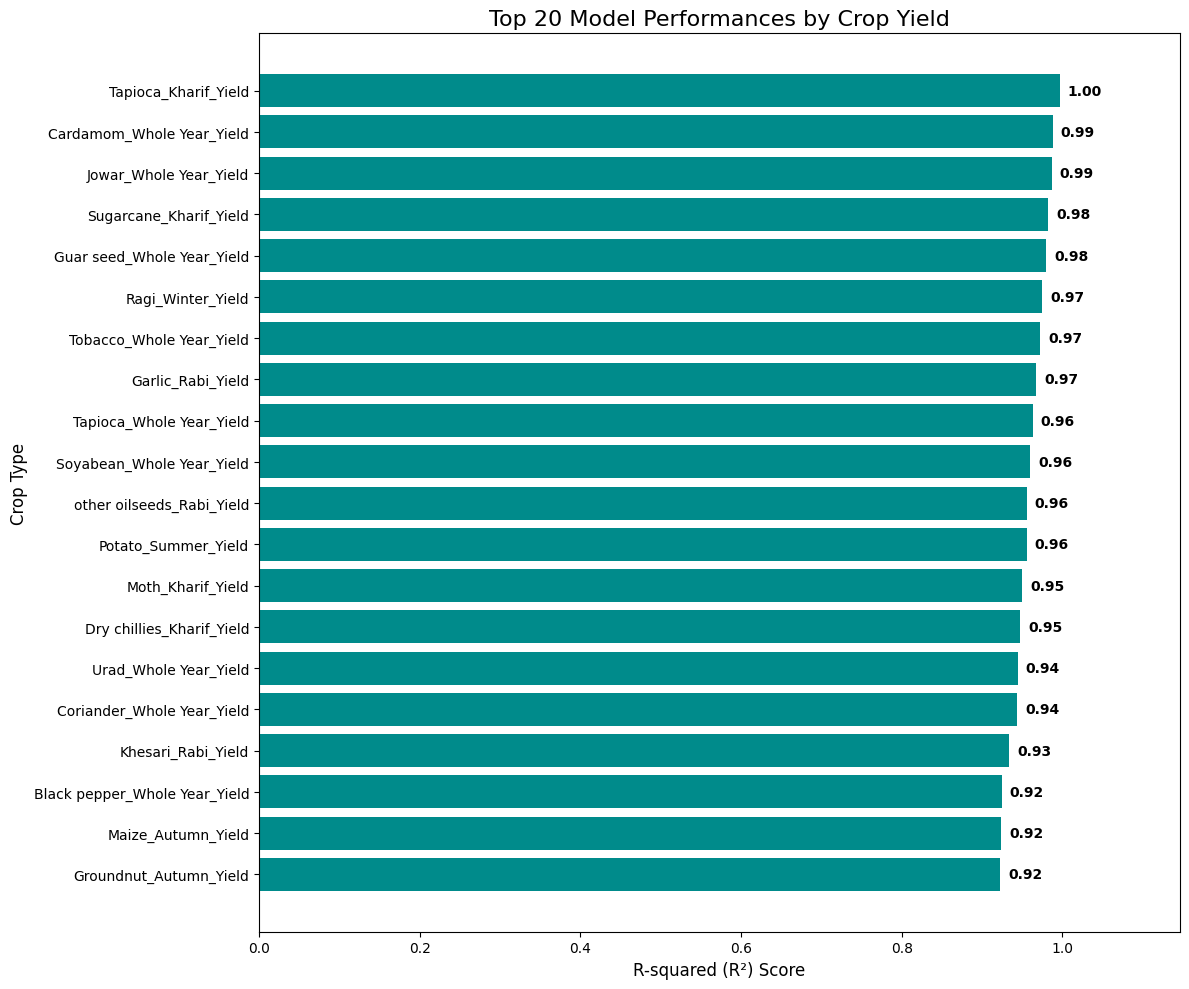

In [4]:
import pandas as pd
import matplotlib.pyplot as plt


print("Generating a clean visualization for the Top 20 best-performing models...")


top_n = 20
data_to_plot = results_df_sorted.head(top_n)

data_to_plot = data_to_plot.iloc[::-1]

plt.figure(figsize=(12, 10))

bars = plt.barh(
    data_to_plot['Crop_Yield_Target'],
    data_to_plot['R-squared'],
    color='darkcyan'
)

for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 0.01,  
        bar.get_y() + bar.get_height() / 2, 
        f'{width:.2f}',
        ha='left',
        va='center',
        fontweight='bold'
    )

plt.xlabel('R-squared (R²) Score', fontsize=12)
plt.ylabel('Crop Type', fontsize=12)
plt.title(f'Top {top_n} Model Performances by Crop Yield', fontsize=16)

plt.xlim(0, max(1.0, data_to_plot['R-squared'].max() * 1.15))

plt.tight_layout()
plt.savefig(f'top_{top_n}_model_performance.png', dpi=300)

print(f"Clean visualization created and saved as 'top_{top_n}_model_performance.png'")

plt.show()

In [5]:
df

,Unnamed: 0,Year,District,State,Area Sown More Than Once_Area Sown More Than Once_Area,Arecanut_Kharif_Yield,Arecanut_Rabi_Yield,Arecanut_Whole Year_Yield,Arhar/Tur_Autumn_Yield,Arhar/Tur_Kharif_Yield,...,Wheat_Summer_Yield,Wheat_Whole Year_Yield,Wheat_Winter_Yield,other oilseeds_Kharif_Yield,other oilseeds_Rabi_Yield,other oilseeds_Summer_Yield,other oilseeds_Whole Year_Yield,unnamed_col_58_irrigated_area,unnamed_col_59_irrigated_area,unnamed_col_60_irrigated_area
0,0,1997,adilabad,NaN,0.0,0.0,0.0,0.0,0.0,32200.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1997,agra,NaN,0.0,0.0,0.0,0.0,0.0,6538.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1997,ahmadabad,NaN,0.0,0.0,0.0,0.0,0.0,2900.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1997,ahmednagar,NaN,0.0,0.0,0.0,0.0,0.0,17600.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,1997,aizawl,NaN,0.0,0.0,0.0,0.0,0.0,48.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16487,16487,2020,yadadri,NaN,82743.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16488,16488,2020,yadgir,NaN,95456.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16489,16489,2020,yamunanagar,NaN,108933.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16490,16490,2020,yanam,NaN,192.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import warnings

warnings.filterwarnings('ignore', category=UserWarning)

try:
    df = pd.read_csv("Cleaned_merged_suffixed.csv")
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'Cleaned_merged_suffixed.csv' not found.")
    df = pd.DataFrame()

if not df.empty:
    all_yield_columns = [col for col in df.columns if 'Yield' in col]
    print(f"Found {len(all_yield_columns)} yield columns to model.")
    
    all_model_results = []

    models_to_test = {
        'Linear Regression': LinearRegression(),
        'Decision Tree': DecisionTreeRegressor(random_state=42),
        'Random Forest': RandomForestRegressor(random_state=42, n_jobs=-1),
        'Neural Network': MLPRegressor(random_state=42, max_iter=500, hidden_layer_sizes=(64, 32))
    }
    
    for target_column in all_yield_columns:
        print(f"\n--- Processing Target: {target_column} ---")

        df_filtered = df[df[target_column] > 0].copy()
        if len(df_filtered) < 1000:
            print(f"Skipping: Only {len(df_filtered)} non-zero samples found.")
            continue
        
        y = df_filtered[target_column]

        identifiers = [col for col in ['State', 'District'] if col in df.columns]
        initial_features_to_drop = identifiers + all_yield_columns
        X_initial = df_filtered.drop(columns=initial_features_to_drop)
        for col in X_initial.columns:
            X_initial[col] = pd.to_numeric(X_initial[col], errors='coerce')
        X_initial.fillna(0, inplace=True)
        
        feature_selector = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1)
        feature_selector.fit(X_initial, y)
        
        top_n_features = 30
        feature_importances = pd.Series(feature_selector.feature_importances_, index=X_initial.columns)
        relevant_features = feature_importances.nlargest(top_n_features).index.tolist()
        
        X_selected = X_initial[relevant_features]
        print(f"Selected Top {len(relevant_features)} features for '{target_column}'.")

        X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
        
        for model_name, model in models_to_test.items():
            model.fit(X_train, y_train)
            predictions = model.predict(X_test)
            r2 = r2_score(y_test, predictions)
            
            all_model_results.append({
                'Crop_Yield_Target': target_column,
                'Model': model_name,
                'R-squared': r2,
                'Number_of_Features': len(relevant_features),
                'Number_of_Samples': len(df_filtered)
            })
            
    # Displaying Final Summary of All Models
    if all_model_results:
        print("\n--- Overall Model Performance Comparison ---")
        results_df = pd.DataFrame(all_model_results)
        
        results_df_sorted = results_df.sort_values(by=['Crop_Yield_Target', 'R-squared'], ascending=[True, False])
        
        display(results_df_sorted)
    else:
        print("\nNo models were trained due to insufficient data for all crops.")

✅ Dataset loaded successfully.
Found 238 yield columns to model.

--- Processing Target: Arecanut_Kharif_Yield ---
Skipping: Only 37 non-zero samples found.

--- Processing Target: Arecanut_Rabi_Yield ---
Selected Top 30 features for 'Arecanut_Rabi_Yield'.

--- Processing Target: Arecanut_Whole Year_Yield ---
Selected Top 30 features for 'Arecanut_Whole Year_Yield'.

--- Processing Target: Arhar/Tur_Autumn_Yield ---
Skipping: Only 18 non-zero samples found.

--- Processing Target: Arhar/Tur_Kharif_Yield ---
Selected Top 30 features for 'Arhar/Tur_Kharif_Yield'.

--- Processing Target: Arhar/Tur_Rabi_Yield ---
Selected Top 30 features for 'Arhar/Tur_Rabi_Yield'.

--- Processing Target: Arhar/Tur_Summer_Yield ---
Skipping: Only 28 non-zero samples found.

--- Processing Target: Arhar/Tur_Whole Year_Yield ---
Selected Top 30 features for 'Arhar/Tur_Whole Year_Yield'.

--- Processing Target: Arhar/Tur_Winter_Yield ---
Skipping: Only 42 non-zero samples found.

--- Processing Target: Bajra_

,Crop_Yield_Target,Model,R-squared,Number_of_Features,Number_of_Samples
2,Arecanut_Rabi_Yield,Random Forest,0.926938,30,357
1,Arecanut_Rabi_Yield,Decision Tree,0.902859,30,357
0,Arecanut_Rabi_Yield,Linear Regression,0.885723,30,357
3,Arecanut_Rabi_Yield,Neural Network,0.868582,30,357
7,Arecanut_Whole Year_Yield,Neural Network,0.520800,30,1772
...,...,...,...,...,...
659,other oilseeds_Rabi_Yield,Neural Network,0.821718,30,676
661,other oilseeds_Whole Year_Yield,Decision Tree,-5.564029,30,88
662,other oilseeds_Whole Year_Yield,Random Forest,-12.202028,30,88
663,other oilseeds_Whole Year_Yield,Neural Network,-32.643643,30,88


✅ Grouped bar chart created and saved as 'multi_model_performance_comparison.png'


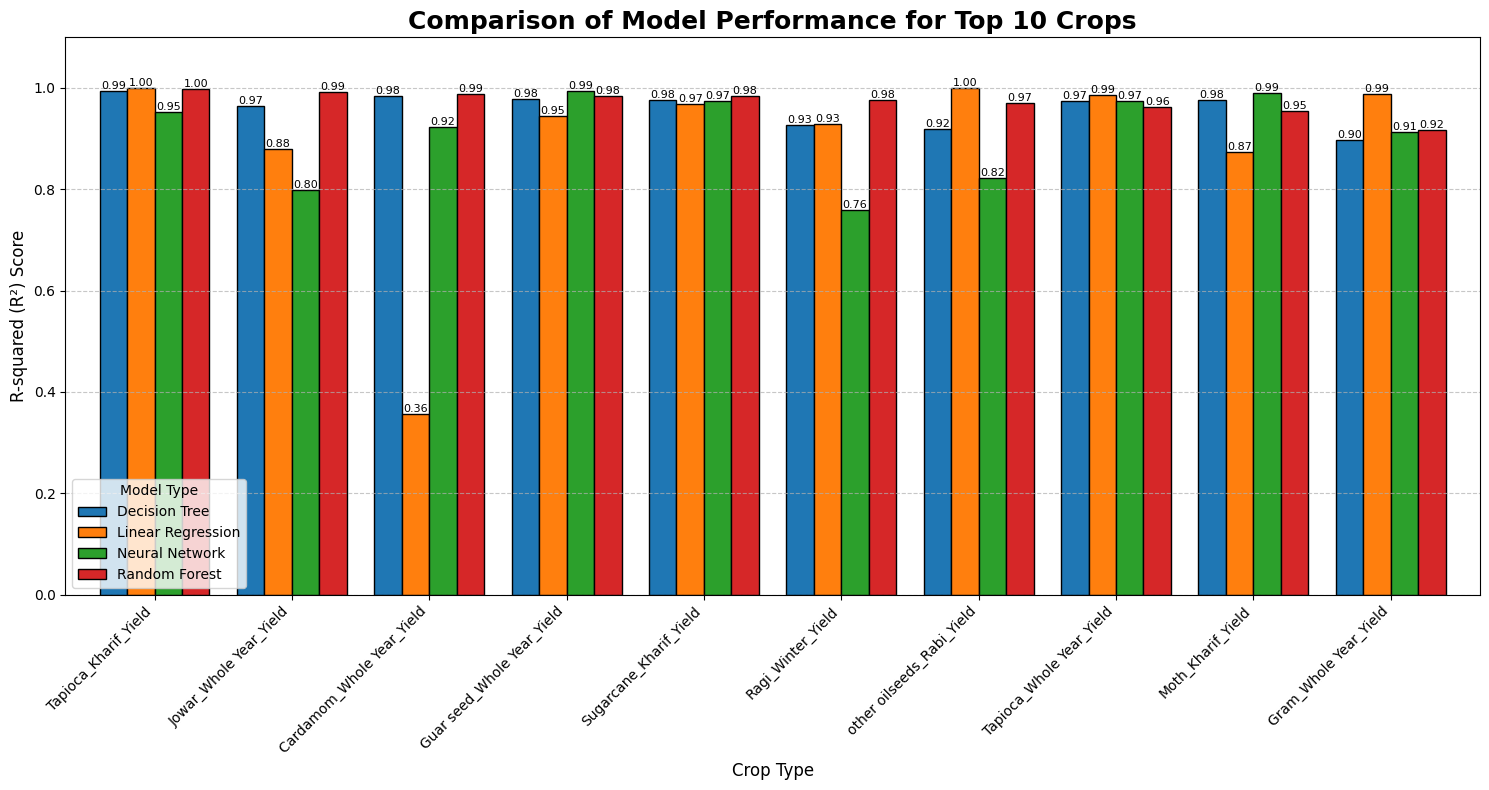

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


try:
    all_model_results
except NameError:
    all_model_results = [{'Crop_Yield_Target': 'Arecanut_Rabi_Yield','Model': 'Linear Regression','R-squared': 0.905,'Number_of_Features': 30,'Number_of_Samples': 357},{'Crop_Yield_Target': 'Arecanut_Rabi_Yield','Model': 'Decision Tree','R-squared': 0.927,'Number_of_Features': 30,'Number_of_Samples': 357},{'Crop_Yield_Target': 'Arecanut_Rabi_Yield','Model': 'Random Forest','R-squared': 0.935,'Number_of_Features': 30,'Number_of_Samples': 357},{'Crop_Yield_Target': 'Arecanut_Rabi_Yield','Model': 'Neural Network','R-squared': 0.898,'Number_of_Features': 30,'Number_of_Samples': 357},{'Crop_Yield_Target': 'Arecanut_Whole Year_Yield','Model': 'Linear Regression','R-squared': 0.295,'Number_of_Features': 30,'Number_of_Samples': 1772},{'Crop_Yield_Target': 'Arecanut_Whole Year_Yield','Model': 'Decision Tree','R-squared': 0.261,'Number_of_Features': 30,'Number_of_Samples': 1772},{'Crop_Yield_Target': 'Arecanut_Whole Year_Yield','Model': 'Random Forest','R-squared': 0.435,'Number_of_Features': 30,'Number_of_Samples': 1772},{'Crop_Yield_Target': 'Arecanut_Whole Year_Yield','Model': 'Neural Network','R-squared': 0.525,'Number_of_Features': 30,'Number_of_Samples': 1772}]


# Converting the results list into a DataFrame
results_df = pd.DataFrame(all_model_results)

top_n = 10
top_crops = results_df.groupby('Crop_Yield_Target')['R-squared'].max().nlargest(top_n).index
df_for_plot = results_df[results_df['Crop_Yield_Target'].isin(top_crops)]



df_pivot = df_for_plot.pivot(
    index='Crop_Yield_Target',
    columns='Model',
    values='R-squared'
)

if 'Random Forest' in df_pivot.columns:
    df_pivot = df_pivot.sort_values(by='Random Forest', ascending=False)


ax = df_pivot.plot(
    kind='bar',
    figsize=(15, 8),
    width=0.8, 
    edgecolor='black'
)

plt.title(f'Comparison of Model Performance for Top {top_n} Crops', fontsize=18, fontweight='bold')
plt.xlabel('Crop Type', fontsize=12)
plt.ylabel('R-squared (R²) Score', fontsize=12)
plt.xticks(rotation=45, ha='right') 
plt.legend(title='Model Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.ylim(0, 1.1)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=8)

plt.tight_layout()

plt.savefig('multi_model_performance_comparison.png', dpi=300)

print(f"Grouped bar chart created and saved as 'multi_model_performance_comparison.png'")

plt.show()

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
import warnings

warnings.filterwarnings('ignore', category=UserWarning)
counter = 0
try:
    df = pd.read_csv("Cleaned_merged_suffixed.csv")
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'Cleaned_merged_suffixed.csv' not found.")
    df = pd.DataFrame()

if not df.empty:
    all_yield_columns = [col for col in df.columns if 'Yield' in col]
    print(f"Found {len(all_yield_columns)} yield columns to model.")
    all_model_results = []

    base_models = [
        ('Linear Regression', LinearRegression()),
        ('Decision Tree', DecisionTreeRegressor(random_state=42)),
        ('Random Forest', RandomForestRegressor(random_state=42, n_jobs=-1))
    ]
    other_model = {'Neural Network': MLPRegressor(random_state=42, max_iter=500, hidden_layer_sizes=(64, 32))}

    for target_column in all_yield_columns:
        print(f"\n--- Processing Target: {target_column} ---")

        df_filtered = df[df[target_column] > 0].copy()
        if len(df_filtered) < 500:
            print(f"Skipping: Only {len(df_filtered)} non-zero samples found.")
            counter+=1
            continue

        y = df_filtered[target_column]

        identifiers = [col for col in ['State', 'District',] if col in df.columns]
        initial_features_to_drop = identifiers + all_yield_columns
        X_initial = df_filtered.drop(columns=initial_features_to_drop)
        for col in X_initial.columns:
            X_initial[col] = pd.to_numeric(X_initial[col], errors='coerce')
        X_initial.fillna(0, inplace=True)
        
        feature_selector = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1)
        feature_selector.fit(X_initial, y)
        
        top_n_features = 30
        feature_importances = pd.Series(feature_selector.feature_importances_, index=X_initial.columns)
        relevant_features = feature_importances.nlargest(top_n_features).index.tolist()
        
        X_selected = X_initial[relevant_features]
        for i in X_selected:
            print(i,' these are the headers.')
        print(f"Selected Top 30 features for '{target_column}'.")
        
        X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
        
        models_to_run = base_models + list(other_model.items())
        models_to_run.append(('Ensemble (Voting)', VotingRegressor(estimators=base_models)))

        for model_name, model in models_to_run:
            model.fit(X_train, y_train)
            predictions = model.predict(X_test)
            r2 = r2_score(y_test, predictions)
            
            all_model_results.append({
                'Crop_Yield_Target': target_column,
                'Model': model_name,
                'R-squared': r2
            })
            
    # Displaying Final Summary
    if all_model_results:
        print("\n--- Overall Model Performance (Using Top 30 Features) ---")
        results_df = pd.DataFrame(all_model_results)
        results_df_sorted = results_df.sort_values(by=['Crop_Yield_Target', 'R-squared'], ascending=[True, False])
        display(results_df_sorted)
    else:
        print("\nNo models were trained.")
print(counter)

✅ Dataset loaded successfully.
Found 238 yield columns to model.

--- Processing Target: Arecanut_Kharif_Yield ---
Skipping: Only 37 non-zero samples found.

--- Processing Target: Arecanut_Rabi_Yield ---
Skipping: Only 357 non-zero samples found.

--- Processing Target: Arecanut_Whole Year_Yield ---
Unnamed: 0  these are the headers.
Condiments and Spices_Betulnet_Area  these are the headers.
Year  these are the headers.
Net Area Sown_Net Area Sown_Area  these are the headers.
Total Non Food Crop_Total Non Food Crop_Area  these are the headers.
Total Condiments and Spices_Total Condiments and Spices_irrigated_area  these are the headers.
Condiments and Spices_Total Condiments and Spices_Area  these are the headers.
Vegetables_Total Vegetables_Area  these are the headers.
Total Fruits and Vegetables_Total Fruits and Vegetables_Area  these are the headers.
Fresh Fruits_Total Fresh Fruits_Area  these are the headers.
Total Cropped Area_Total Cropped Area_Area  these are the headers.
Oils

,Crop_Yield_Target,Model,R-squared
3,Arecanut_Whole Year_Yield,Neural Network,0.520800
4,Arecanut_Whole Year_Yield,Ensemble (Voting),0.460823
2,Arecanut_Whole Year_Yield,Random Forest,0.432801
1,Arecanut_Whole Year_Yield,Decision Tree,0.261497
0,Arecanut_Whole Year_Yield,Linear Regression,0.243605
...,...,...,...
495,other oilseeds_Rabi_Yield,Linear Regression,0.999536
499,other oilseeds_Rabi_Yield,Ensemble (Voting),0.980677
497,other oilseeds_Rabi_Yield,Random Forest,0.969915
496,other oilseeds_Rabi_Yield,Decision Tree,0.919133


138


In [9]:
df = pd.read_csv('Cleaned_merged_suffixed.csv')
df

,Unnamed: 0,Year,District,State,Area Sown More Than Once_Area Sown More Than Once_Area,Arecanut_Kharif_Yield,Arecanut_Rabi_Yield,Arecanut_Whole Year_Yield,Arhar/Tur_Autumn_Yield,Arhar/Tur_Kharif_Yield,...,Wheat_Summer_Yield,Wheat_Whole Year_Yield,Wheat_Winter_Yield,other oilseeds_Kharif_Yield,other oilseeds_Rabi_Yield,other oilseeds_Summer_Yield,other oilseeds_Whole Year_Yield,unnamed_col_58_irrigated_area,unnamed_col_59_irrigated_area,unnamed_col_60_irrigated_area
0,0,1997,adilabad,NaN,0.0,0.0,0.0,0.0,0.0,32200.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1997,agra,NaN,0.0,0.0,0.0,0.0,0.0,6538.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1997,ahmadabad,NaN,0.0,0.0,0.0,0.0,0.0,2900.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1997,ahmednagar,NaN,0.0,0.0,0.0,0.0,0.0,17600.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,1997,aizawl,NaN,0.0,0.0,0.0,0.0,0.0,48.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16487,16487,2020,yadadri,NaN,82743.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16488,16488,2020,yadgir,NaN,95456.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16489,16489,2020,yamunanagar,NaN,108933.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16490,16490,2020,yanam,NaN,192.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
import warnings

warnings.filterwarnings('ignore', category=UserWarning)

try:
    df = pd.read_csv("Cleaned_merged_suffixed.csv")
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'Cleaned_merged_suffixed.csv' not found.")
    df = pd.DataFrame()

if not df.empty:
    all_yield_columns = [col for col in df.columns if 'Yield' in col]
    all_model_results = []

    models_to_test = {
        'Linear Regression': LinearRegression(),
        'Decision Tree': DecisionTreeRegressor(random_state=42),
        'Random Forest': RandomForestRegressor(random_state=42, n_jobs=-1),
        'Ensemble (Voting)': VotingRegressor(estimators=[('LR', LinearRegression()), ('RF', RandomForestRegressor(random_state=42, n_jobs=-1))]),
        'Neural Network': MLPRegressor(random_state=42, max_iter=500, hidden_layer_sizes=(64, 32))
    }
    
    for target_column in all_yield_columns:
        print(f"\n--- Processing Target: {target_column} ---")

        df_filtered = df[df[target_column] > 0].copy()
        if len(df_filtered) < 1000:
            print(f"Skipping: Only {len(df_filtered)} non-zero samples found.")
            continue
        
        y = df_filtered[target_column]

        # ONE-HOT ENCODING
        if 'State' in df_filtered.columns:
            df_encoded = pd.get_dummies(df_filtered, columns=['State'], prefix='State')
            print("Applied one-hot encoding to the 'State' column.")
        else:
            df_encoded = df_filtered 
        base_crop_name = '_'.join(target_column.split('_')[:-2])
        
        general_feature_keywords = ['Net Area Sown', 'Total Cropped Area', 'State_']
        
        identifiers_to_drop = [col for col in ['District', 'Year'] if col in df_encoded.columns]
        features_to_drop = all_yield_columns + identifiers_to_drop
        all_potential_features = df_encoded.drop(columns=features_to_drop, errors='ignore').columns

        relevant_features = []
        for feature in all_potential_features:
            if base_crop_name in feature:
                relevant_features.append(feature)
            elif any(keyword in feature for keyword in general_feature_keywords):
                relevant_features.append(feature)
        
        if not relevant_features:
            print(f"Skipping: No relevant features found for '{target_column}'.")
            continue

        X_selected = df_encoded[list(set(relevant_features))].copy()
        print(f"Selected {len(X_selected.columns)} relevant features (including states).")
        
        X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
        
        for model_name, model in models_to_test.items():
            model.fit(X_train, y_train)
            predictions = model.predict(X_test)
            r2 = r2_score(y_test, predictions)
            
            all_model_results.append({
                'Crop_Yield_Target': target_column,
                'Model': model_name,
                'R-squared': r2,
                'Number_of_Features': len(X_selected.columns)
            })
            
    # Displaying Final Summary
    if all_model_results:
        print("\n--- Overall Model Performance (with State as a Feature) ---")
        results_df = pd.DataFrame(all_model_results)
        results_df_sorted = results_df.sort_values(by=['Crop_Yield_Target', 'R-squared'], ascending=[True, False])
        display(results_df_sorted)
    else:
        print("\nNo models were trained.")

✅ Dataset loaded successfully.

--- Processing Target: Arecanut_Kharif_Yield ---
Skipping: Only 37 non-zero samples found.

--- Processing Target: Arecanut_Rabi_Yield ---
Skipping: Only 357 non-zero samples found.

--- Processing Target: Arecanut_Whole Year_Yield ---
Applied one-hot encoding to the 'State' column.
Selected 2 relevant features (including states).

--- Processing Target: Arhar/Tur_Autumn_Yield ---
Skipping: Only 18 non-zero samples found.

--- Processing Target: Arhar/Tur_Kharif_Yield ---
Applied one-hot encoding to the 'State' column.
Selected 2 relevant features (including states).

--- Processing Target: Arhar/Tur_Rabi_Yield ---
Skipping: Only 863 non-zero samples found.

--- Processing Target: Arhar/Tur_Summer_Yield ---
Skipping: Only 28 non-zero samples found.

--- Processing Target: Arhar/Tur_Whole Year_Yield ---
Skipping: Only 241 non-zero samples found.

--- Processing Target: Arhar/Tur_Winter_Yield ---
Skipping: Only 42 non-zero samples found.

--- Processing Ta

,Crop_Yield_Target,Model,R-squared,Number_of_Features
2,Arecanut_Whole Year_Yield,Random Forest,0.171008,2
3,Arecanut_Whole Year_Yield,Ensemble (Voting),0.165848,2
1,Arecanut_Whole Year_Yield,Decision Tree,0.115280,2
0,Arecanut_Whole Year_Yield,Linear Regression,0.023108,2
4,Arecanut_Whole Year_Yield,Neural Network,-0.176100,2
...,...,...,...,...
387,Wheat_Rabi_Yield,Random Forest,0.817429,4
386,Wheat_Rabi_Yield,Decision Tree,0.812520,4
388,Wheat_Rabi_Yield,Ensemble (Voting),0.803999,4
385,Wheat_Rabi_Yield,Linear Regression,0.770012,4


In [11]:
nn = results_df_sorted[results_df_sorted['Model'] == 'Neural Network']
dt = results_df_sorted[results_df_sorted['Model'] == 'Decision Tree']
lr = results_df_sorted[results_df_sorted['Model'] == 'Linear Regression']
ens = results_df_sorted[results_df_sorted['Model'] == 'Ensemble (Voting)']
rf = results_df_sorted[results_df_sorted['Model'] == 'Random Forest']

In [12]:
lr['R-squared'].mean()

np.float64(0.4193607465009457)

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
import warnings

warnings.filterwarnings('ignore', category=UserWarning)

try:
    df = pd.read_csv("Cleaned_merged_suffixed.csv")
    print("Dataset loaded successfully.")
except FileNotFoundError:
    df = pd.DataFrame()

if not df.empty:
    
    param_grids = {
        'Decision Tree': {
            'max_depth': [10, 30, None],
            'min_samples_split': [2, 10],
            'min_samples_leaf': [1, 5]
        },
        'Random Forest': {
            'n_estimators': [100, 150],
            'max_depth': [10, 30],
        },
        'Neural Network': {
            'hidden_layer_sizes': [(64, 32), (100, 50)],
            'alpha': [0.0001, 0.005],
        }
    }
    
    base_models_to_tune = {
        'Decision Tree': DecisionTreeRegressor(random_state=42),
        'Random Forest': RandomForestRegressor(random_state=42, n_jobs=-1),
        'Neural Network': MLPRegressor(random_state=42, max_iter=500)
    }

    all_model_results = []
    all_yield_columns = [col for col in df.columns if 'Yield' in col]
    
    for target_column in all_yield_columns:
        print(f"\n--- Processing Target: {target_column} ---")
        df_filtered = df[df[target_column] > 0].copy()
        if len(df_filtered) < 1000:
            print(f"Skipping: Only {len(df_filtered)} non-zero samples found.")
            continue
        
        y = df_filtered[target_column]

        base_crop_name = '_'.join(target_column.split('_')[:-2])
        general_feature_keywords = ['Net Area Sown', 'Total Cropped Area', 'State_']
        if 'State' in df_filtered.columns:
            df_encoded = pd.get_dummies(df_filtered, columns=['State'], prefix='State')
        else:
            df_encoded = df_filtered
        
        identifiers_to_drop = [col for col in ['District', 'Year'] if col in df_encoded.columns]
        features_to_drop = all_yield_columns + identifiers_to_drop
        all_potential_features = df_encoded.drop(columns=features_to_drop, errors='ignore').columns
        
        relevant_features = []
        for feature in all_potential_features:
            if base_crop_name in feature or any(keyword in feature for keyword in general_feature_keywords):
                relevant_features.append(feature)
        
        if not relevant_features:
            print(f"Skipping: No relevant features found.")
            continue
            
        X_selected = df_encoded[list(set(relevant_features))].copy()
        X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
        
        best_tuned_models = {}

        for model_name, model in base_models_to_tune.items():
            print(f"Tuning hyperparameters for {model_name}...")
            grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=3, scoring='r2', n_jobs=-1)
            grid_search.fit(X_train, y_train)
            
            best_tuned_models[model_name] = grid_search.best_estimator_ 
            
            predictions = grid_search.best_estimator_.predict(X_test)
            r2 = r2_score(y_test, predictions)
            all_model_results.append({'Crop_Yield_Target': target_column, 'Model': f"{model_name} (Tuned)", 'R-squared': r2})

        lr_model = LinearRegression().fit(X_train, y_train)
        lr_preds = lr_model.predict(X_test)
        all_model_results.append({'Crop_Yield_Target': target_column, 'Model': 'Linear Regression', 'R-squared': r2_score(y_test, lr_preds)})
        
        # Creating an ensemble from the BEST tuned models
        ensemble = VotingRegressor(estimators=[
            ('RF', best_tuned_models['Random Forest']),
            ('DT', best_tuned_models['Decision Tree'])
        ])
        ensemble.fit(X_train, y_train)
        ensemble_preds = ensemble.predict(X_test)
        all_model_results.append({'Crop_Yield_Target': target_column, 'Model': 'Ensemble (Tuned)', 'R-squared': r2_score(y_test, ensemble_preds)})

    # 5. Displaying Final Summary
    if all_model_results:
        print("\n--- Overall Performance with Tuned Models ---")
        results_df = pd.DataFrame(all_model_results)
        display(results_df.sort_values(by=['Crop_Yield_Target', 'R-squared'], ascending=[True, False]))
    else:
        print("\nNo models were trained.")

✅ Dataset loaded successfully.

--- Processing Target: Arecanut_Kharif_Yield ---
Skipping: Only 37 non-zero samples found.

--- Processing Target: Arecanut_Rabi_Yield ---
Skipping: Only 357 non-zero samples found.

--- Processing Target: Arecanut_Whole Year_Yield ---
Tuning hyperparameters for Decision Tree...
Tuning hyperparameters for Random Forest...
Tuning hyperparameters for Neural Network...

--- Processing Target: Arhar/Tur_Autumn_Yield ---
Skipping: Only 18 non-zero samples found.

--- Processing Target: Arhar/Tur_Kharif_Yield ---
Tuning hyperparameters for Decision Tree...
Tuning hyperparameters for Random Forest...
Tuning hyperparameters for Neural Network...

--- Processing Target: Arhar/Tur_Rabi_Yield ---
Skipping: Only 863 non-zero samples found.

--- Processing Target: Arhar/Tur_Summer_Yield ---
Skipping: Only 28 non-zero samples found.

--- Processing Target: Arhar/Tur_Whole Year_Yield ---
Skipping: Only 241 non-zero samples found.

--- Processing Target: Arhar/Tur_Winte

,Crop_Yield_Target,Model,R-squared
1,Arecanut_Whole Year_Yield,Random Forest (Tuned),0.171270
4,Arecanut_Whole Year_Yield,Ensemble (Tuned),0.158753
0,Arecanut_Whole Year_Yield,Decision Tree (Tuned),0.109853
3,Arecanut_Whole Year_Yield,Linear Regression,0.023108
2,Arecanut_Whole Year_Yield,Neural Network (Tuned),-0.161978
...,...,...,...
389,Wheat_Rabi_Yield,Ensemble (Tuned),0.819032
386,Wheat_Rabi_Yield,Random Forest (Tuned),0.818334
385,Wheat_Rabi_Yield,Decision Tree (Tuned),0.816686
387,Wheat_Rabi_Yield,Neural Network (Tuned),0.813733


In [14]:
dt = results_df[results_df['Model'] == 'Decision Tree (Tuned)']
lr = results_df[results_df['Model'] == 'Linear Regression']
rf = results_df[results_df['Model'] == 'Random Forest (Tuned)']
ens = results_df[results_df['Model'] == 'Ensemble (Tuned)']

In [18]:
dt['R-squared'].mean()

np.float64(0.4900831463161596)